<a href="https://colab.research.google.com/github/gfxluffy/Tweet-Emotion-Recognition-with-TensorFlow/blob/main/Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 13.3 MB/s 
     |████████████████████████████████| 243 kB 48.0 MB/s 


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

# Pass history object from model training
# The func plots the accuracy, validation acc, loss, validation loss
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Use confusion matrix from sklearn, calc it for our preds against the GT, plot using pyplot
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def get_tweet(data):
  tweets = [x['text'] for x in data] 
  labels = [x['label'] for x in data]
  return tweets, labels

In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[2], labels[2]

('im grabbing a minute to post i feel greedy wrong', 'anger')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Tokenization is the process of converting words to numbers

# Create a corpus of all the words that exist in the dataset and 
# give each unique word a unique corresponding token
# You can set a limit to how many most frequently used words are tokenized; less commonly used words are ignored (given common token)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>') # Use 10000 most-frequently used words and set an out of vocab token
tokenizer.fit_on_texts(tweets) # Create a mapping from words to numeric token

In [ ]:
tokenizer.texts_to_sequences([tweets[2]])

[[17, 3060, 7, 1149, 5, 286, 2, 3, 495, 438]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

! The model will need a fixed input shape

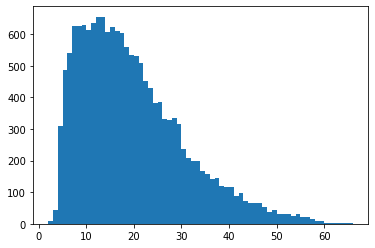

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [ ]:
maxlen = 50 # Any tweet with > 50 words will be truncated

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[2]

array([  17, 3060,    7, 1149,    5,  286,    2,    3,  495,  438,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{'sadness', 'fear', 'anger', 'surprise', 'joy', 'love'}


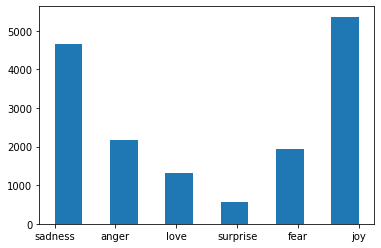

In [ ]:
plt.hist(labels, bins=11)
plt.show()
# Class imbalance problem

In [30]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [31]:
class_to_index

{'anger': 2, 'fear': 1, 'joy': 4, 'love': 5, 'sadness': 0, 'surprise': 3}

In [32]:
index_to_class

{0: 'sadness', 1: 'fear', 2: 'anger', 3: 'surprise', 4: 'joy', 5: 'love'}

In [33]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels]) # Return np array of numeric values for the labels

In [35]:
train_labels = names_to_ids(labels)
print(train_labels[2])

2


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [36]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen), # vocab size, embedding dim, input len
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)), # Bidirectional - context can go from L to R & R to L, 20 cells, each time step will have output
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax') # 6 units for each class                             
])

model.compile(
    loss = 'sparse_categorical_crossentropy', # categorical_crossentropy bec multi-class classification, sparse because we're not using one-hot encoding
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [39]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [40]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [41]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2) # If no improvement in val_accuracy for 2 epochs, stop training!
    ]
)

Epoch 1/20
500/500 [==============================] - 39s 61ms/step - loss: 1.2722 - accuracy: 0.5010 - val_loss: 0.8122 - val_accuracy: 0.6885
Epoch 2/20
500/500 [==============================] - 28s 56ms/step - loss: 0.5300 - accuracy: 0.8129 - val_loss: 0.5707 - val_accuracy: 0.8055
Epoch 3/20
500/500 [==============================] - 28s 57ms/step - loss: 0.4085 - accuracy: 0.8571 - val_loss: 0.6405 - val_accuracy: 0.7970
Epoch 4/20
500/500 [==============================] - 28s 57ms/step - loss: 0.2826 - accuracy: 0.9121 - val_loss: 0.4566 - val_accuracy: 0.8595
Epoch 5/20
500/500 [==============================] - 28s 57ms/step - loss: 0.1718 - accuracy: 0.9471 - val_loss: 0.4595 - val_accuracy: 0.8625
Epoch 6/20
500/500 [==============================] - 28s 56ms/step - loss: 0.1378 - accuracy: 0.9576 - val_loss: 0.4517 - val_accuracy: 0.8725
Epoch 7/20
500/500 [==============================] - 28s 57ms/step - loss: 0.1075 - accuracy: 0.9674 - val_loss: 0.4132 - val_accuracy:

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

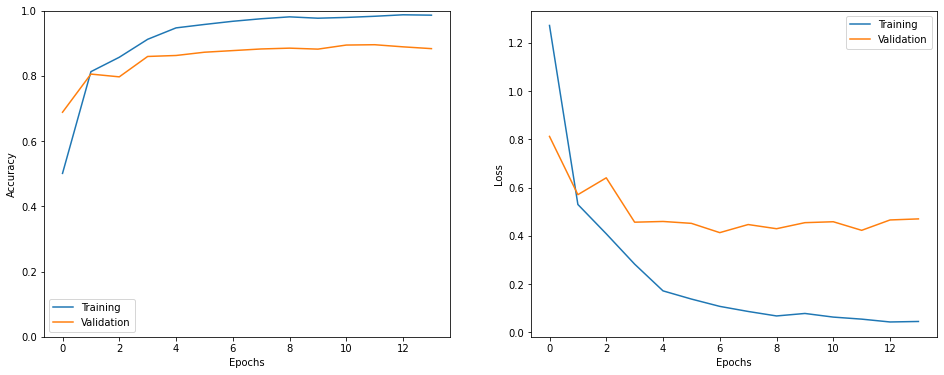

In [42]:
show_history(h)

In [43]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [44]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 20ms/step - loss: 0.5029 - accuracy: 0.8805


In [51]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_tweets[i])
print('Emotion', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0] # expand_dims makes test input the appropriate shape at one example
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)

Sentence: i have been learning and re learning the lesson that no matter how i feel about myself or even how others may feel about me i am treasured by god
Emotion love
Predicted Emotion: love


In [57]:
preds = np.argmax(model.predict(test_seq), axis=-1) # Look at all preds against all GTs

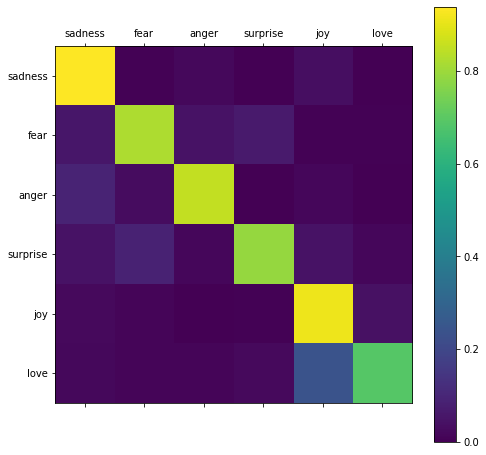

In [63]:
show_confusion_matrix(test_labels, preds, list(classes))